### Robot Sensei ###

In [1]:
from robomaster import robot
import time
import threading
import copy
import pandas as pd

data_log = []
stop_event = threading.Event()
robot_graph = {
    'tof': 0
}

def sub_data_handler(sub_info):
    # รับข้อมูลระยะทางจากเซ็นเซอร์ TOF โดยบวกระยะทาง 75 มิลลิเมตร
    robot_graph['tof'] = sub_info[0]+100


def data_logger(log_interval):
    """
    ฟังก์ชันนี้จะทำงานใน background thread
    เพื่อบันทึกสถานะของหุ่นยนต์ลง list ตามช่วงเวลาที่กำหนด
    """
    while not stop_event.is_set():
        robot_graph['timestamp'] = pd.Timestamp.now()
        current_log = copy.deepcopy(robot_graph)
        data_log.append(current_log)
        time.sleep(log_interval)
    print("Data logger thread stopped.")

#สร้างออปเจ็คและกำหนดค่าเชื่อมต่อกับหุ่นยนต์
if __name__ == "__main__":
    ep_robot = robot.Robot()
    ep_robot.initialize(conn_type="ap")
    ep_gimbal = ep_robot.gimbal
    ep_gimbal.moveto(pitch=0, yaw=0).wait_for_completed()
    ep_sensor = ep_robot.sensor
    #ปรับความถี่การเก็บข้อมูลของเซ็นเซอร์ TOF และกิมบอล
    log_interval = 0.05
    logger_thread = threading.Thread(target=data_logger, args=(log_interval,))


    logger_thread.start()

    ep_sensor.sub_distance(freq=20, callback=sub_data_handler)
    time.sleep(30)


    # หมุนกิมบอลไปที่ yaw=-90 ด้วยความเร็ว 45 องศา/วินาที


    # หยุด data logger
    stop_event.set()
    logger_thread.join()

    ep_robot.close()
    # บันทึกข้อมูลที่เก็บรวบรวมลงในไฟล์ CSV
    df = pd.DataFrame(data_log)
    # จัดลำดับคอลัมน์ให้สวยงาม
    cols = [k for k in robot_graph.keys()]
    df = df[cols]
    df.to_csv("first_glass.csv", index=False)
    print("Data saved to robot_full_data.csv successfully.")

Data logger thread stopped.
Data saved to robot_full_data.csv successfully.


In [7]:
from robomaster import robot
import time
import threading
import copy
import pandas as pd

data_log = []
stop_event = threading.Event()
robot_graph = {
    'angle': 0,
    'tof': 0
}

def sub_data_handler(sub_info):
    # รับข้อมูลระยะทางจากเซ็นเซอร์ TOF โดยบวกระยะทาง 75 มิลลิเมตร
    robot_graph['tof'] = sub_info[0]+100


def data_logger(log_interval):
    """
    ฟังก์ชันนี้จะทำงานใน background thread
    เพื่อบันทึกสถานะของหุ่นยนต์ลง list ตามช่วงเวลาที่กำหนด
    """
    while not stop_event.is_set():
        robot_graph['timestamp'] = pd.Timestamp.now()
        current_log = copy.deepcopy(robot_graph)
        data_log.append(current_log)
        time.sleep(log_interval)
    print("Data logger thread stopped.")

#สร้างออปเจ็คและกำหนดค่าเชื่อมต่อกับหุ่นยนต์
if __name__ == "__main__":
    ep_robot = robot.Robot()
    ep_robot.initialize(conn_type="ap")
    ep_gimbal = ep_robot.gimbal
    ep_gimbal.moveto(pitch=0, yaw=0).wait_for_completed()
    ep_sensor = ep_robot.sensor
    #ปรับความถี่การเก็บข้อมูลของเซ็นเซอร์ TOF และกิมบอล
    log_interval = 0.05
    logger_thread = threading.Thread(target=data_logger, args=(log_interval,))


    logger_thread.start()

    ep_sensor.sub_distance(freq=20, callback=sub_data_handler)
    time.sleep(30)


    # หมุนกิมบอลไปที่ yaw=-90 ด้วยความเร็ว 45 องศา/วินาที


    # หยุด data logger
    stop_event.set()
    logger_thread.join()

    ep_robot.close()
    # บันทึกข้อมูลที่เก็บรวบรวมลงในไฟล์ CSV
    df = pd.DataFrame(data_log)
    # จัดลำดับคอลัมน์ให้สวยงาม
    cols = [k for k in robot_graph.keys()]
    df = df[cols]
    df.to_csv("two_glass.csv", index=False)
    print("Data saved to robot_full_data.csv successfully.")

Data logger thread stopped.
Data saved to robot_full_data.csv successfully.


In [19]:
from robomaster import robot
import time
import threading
import copy
import pandas as pd

data_log = []
stop_event = threading.Event()
robot_graph = {
    'angle': 0,
    'tof': 0
}

def sub_data_handler(sub_info):
    # รับข้อมูลระยะทางจากเซ็นเซอร์ TOF โดยบวกระยะทาง 75 มิลลิเมตร
    robot_graph['tof'] = sub_info[0]-100


def data_logger(log_interval):
    """
    ฟังก์ชันนี้จะทำงานใน background thread
    เพื่อบันทึกสถานะของหุ่นยนต์ลง list ตามช่วงเวลาที่กำหนด
    """
    while not stop_event.is_set():
        robot_graph['timestamp'] = pd.Timestamp.now()
        current_log = copy.deepcopy(robot_graph)
        data_log.append(current_log)
        time.sleep(log_interval)
    print("Data logger thread stopped.")

#สร้างออปเจ็คและกำหนดค่าเชื่อมต่อกับหุ่นยนต์
if __name__ == "__main__":
    ep_robot = robot.Robot()
    ep_robot.initialize(conn_type="ap")
    ep_gimbal = ep_robot.gimbal
    ep_gimbal.moveto(pitch=0, yaw=0).wait_for_completed()
    ep_sensor = ep_robot.sensor
    #ปรับความถี่การเก็บข้อมูลของเซ็นเซอร์ TOF และกิมบอล
    log_interval = 0.05
    logger_thread = threading.Thread(target=data_logger, args=(log_interval,))


    logger_thread.start()

    ep_sensor.sub_distance(freq=20, callback=sub_data_handler)
    time.sleep(30)


    # หมุนกิมบอลไปที่ yaw=-90 ด้วยความเร็ว 45 องศา/วินาที


    # หยุด data logger
    stop_event.set()
    logger_thread.join()

    ep_robot.close()
    # บันทึกข้อมูลที่เก็บรวบรวมลงในไฟล์ CSV
    df = pd.DataFrame(data_log)
    # จัดลำดับคอลัมน์ให้สวยงาม
    cols = [k for k in robot_graph.keys()]
    df = df[cols]
    df.to_csv("three_glass.csv", index=False)
    print("Data saved to robot_full_data.csv successfully.")

Data logger thread stopped.
Data saved to robot_full_data.csv successfully.


In [24]:
import pandas as pd
first_glass = pd.read_csv("first_glass.csv")
two_glass = pd.read_csv("two_glass.csv")
three_glass = pd.read_csv("three_glass.csv")

# Subtract 100 from the 'tof' column values
first_glass['tof'] = first_glass['tof'] - 100
two_glass['tof'] = two_glass['tof'] - 100


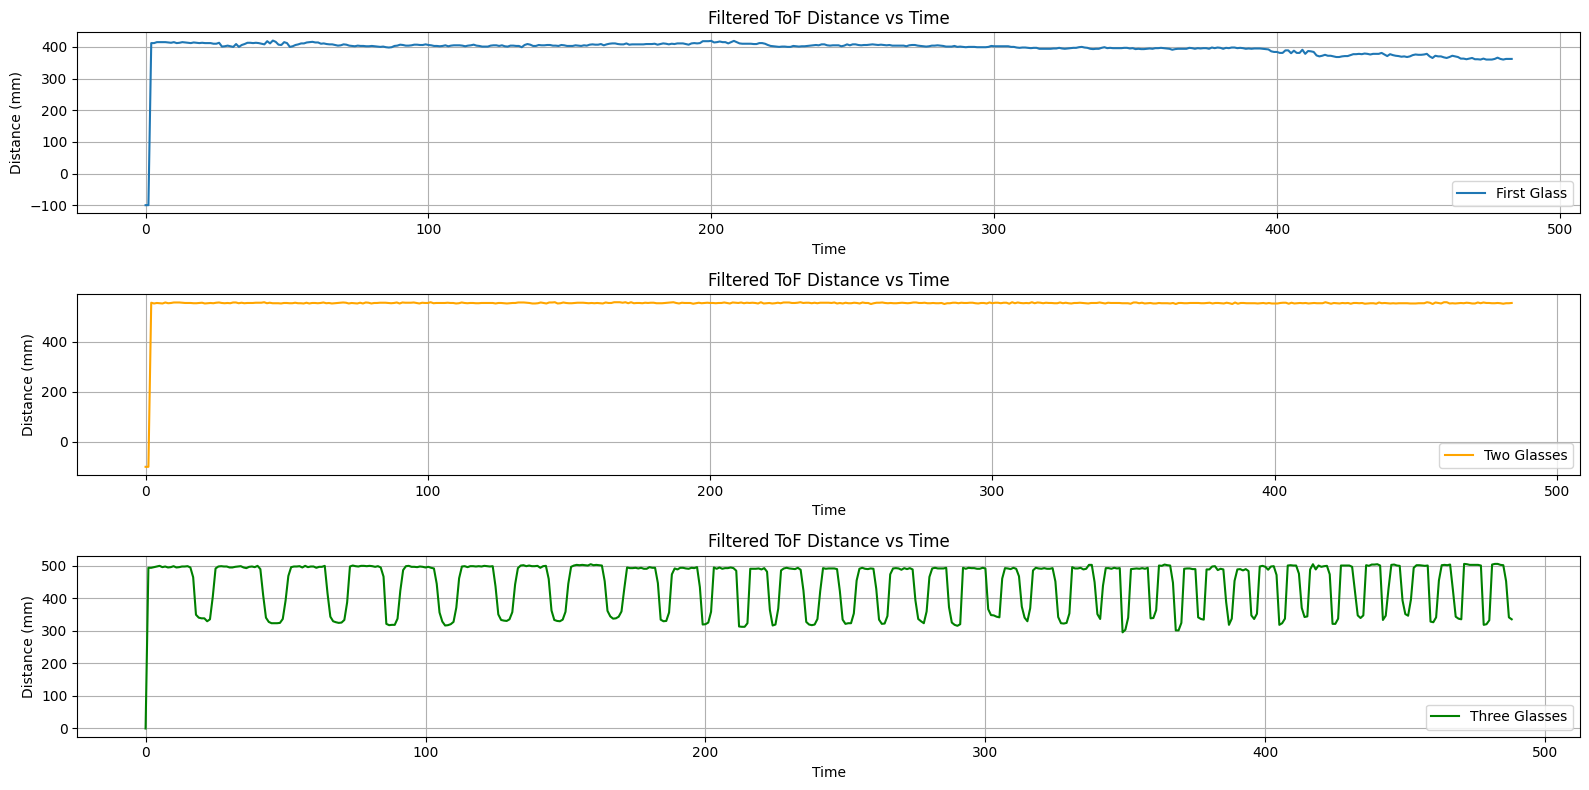

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# แปลง timestamp เป็น datetime

plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 1)
plt.plot(first_glass.index, first_glass['tof'], label='First Glass')
plt.xlabel("Time")
plt.ylabel("Distance (mm)")
plt.title("Filtered ToF Distance vs Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.subplot(3, 1, 2)
plt.plot(two_glass.index, two_glass['tof'], label='Two Glasses', color='orange')
plt.xlabel("Time")
plt.ylabel("Distance (mm)")
plt.title("Filtered ToF Distance vs Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.subplot(3, 1, 3)
plt.plot(three_glass.index, three_glass['tof'], label='Three Glasses', color='green')
plt.xlabel("Time")
plt.ylabel("Distance (mm)")
plt.title("Filtered ToF Distance vs Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
